In [1]:
import pandas as pd
import numpy as np
import json
import random

%matplotlib widget

from matplotlib import pyplot as plt

In [2]:
file_path = '../raw_data/commonsense_dialogues/train.json'

In [3]:
content = []
with open(file_path, "r", encoding="utf-8") as file:
    content = file.read()

In [5]:
parsed_json = json.loads(content)
print(len(list(parsed_json.keys())))

9058


In [6]:
num_turns = []
for item in parsed_json.values():
    num_turns.append(len(item['turns']))

print(f'mean: {np.mean(num_turns)}, std: {np.std(num_turns)}')
print(f'min: {np.min(num_turns)}, max: {np.max(num_turns)}')

mean: 5.722124089202914, std: 0.6317906724543885
min: 4, max: 7


In [18]:
prompt_completion_pairs = []

for item in parsed_json.values():
    prompt = ''
    for i in range(0, len(item['turns'])-1, 2):
        if i ==0:
            prompt += f"User: {item['turns'][i]}\nAgent:"
        else:
            prompt += f"\nUser: {item['turns'][i]}\nAgent:"
        
        completion = item['turns'][i+1]

        completion = " " + completion + ' END'
        
        prompt_completion_pairs.append((prompt, completion))

        # if i % 10 == 0: # prevent prompt gets too long
        #     prompt = ""
        # else:
        prompt += completion


In [19]:
print(len(prompt_completion_pairs))

25552


In [23]:
random.shuffle(prompt_completion_pairs)

for pairs in prompt_completion_pairs[:10]:
    print('='*60 +'\n')
    print(f"{pairs[0]}{pairs[1]}")


User: I love to use my bike instead of my car.
Agent: It's a good idea because it is environment friendly. END
User: That's true. I just need to remember to lock my bike before I enter the store.
Agent: Oh yes! You're doomed should you forget. END
User: It will be gone quickly.
Agent: You are right about that. END

User: I'm not going to Jesse's party tomorrow night.
Agent: Why not? END
User: Do you remember last year when he hit my mom's car and refused to pay for the damages, so I had to pay for it myself?
Agent: Yes. You weren't allowed to use your mom's car again and you had to ride your bike everywhere. END

User: I can't wait for the food to get here, I'm so hungry!
Agent: Yeah, same, I'm glad they finally took our order. END

User: I didn't want to spend a lot of money on gas but I had no choice.
Agent: I hate driving through the town because gas cost so much. END

User: Man, we are going to be late for our hiking trip.
Agent: Why would you say that? We have plenty of time END


In [24]:
import re

word_pattern = re.compile(r'\b\w+\b')


def count_words(raw_text) -> int:
    if raw_text is None or raw_text == '':
        return 0

    word_count = len(word_pattern.findall(raw_text))

    return word_count

In [25]:
text_length = []
for pair in prompt_completion_pairs:
    text_length.append(count_words(pair[0]+pair[1]))

print(f'mean: {np.mean(text_length)}, std: {np.std(text_length)}')
print(f'min: {np.min(text_length)}, max: {np.max(text_length)}')

mean: 47.04379304946775, std: 24.611980994388272
min: 6, max: 202


Text(0.5, 1.0, 'Text Length Distribution')

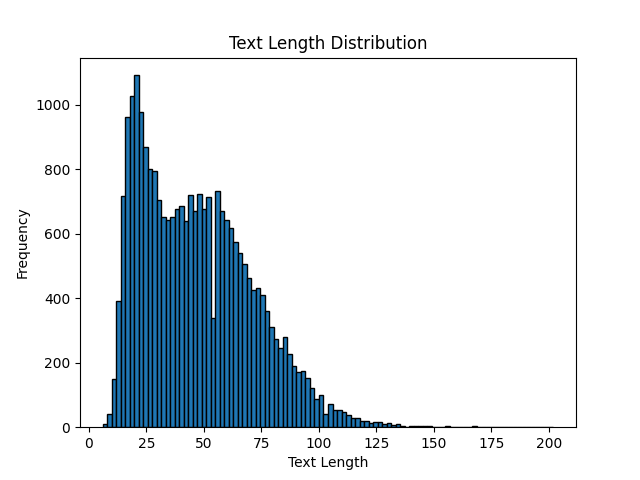

In [26]:
# Plotting the text length distribution
fit = plt.figure()
plt.hist(text_length, bins=100, edgecolor='black')  # Adjust the number of bins as per your preference
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')


In [27]:
import tiktoken

tokenizer = tiktoken.get_encoding('p50k_base')

token_length = []

for pair in prompt_completion_pairs:
    token_length.append(len(tokenizer.encode_ordinary(pair[0]+pair[1])))

print(f'mean: {np.mean(token_length)}, std: {np.std(token_length)}')
print(f'min: {np.min(token_length)}, max: {np.max(token_length)}')

mean: 60.28608328115216, std: 30.703492870562396
min: 11, max: 236


Text(0.5, 1.0, 'Token Length Distribution')

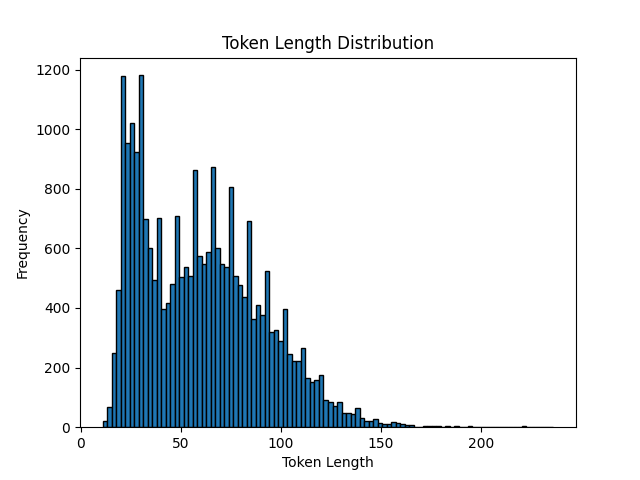

In [28]:
# Plotting the token length distribution
fit = plt.figure()
plt.hist(token_length, bins=100, edgecolor='black')  # Adjust the number of bins as per your preference
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')